# Лабораторная работа 2

## Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scripts.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

=========== You can safely ignore the message below if you are NOT working on ConvolutionalNetworks.ipynb ===========
	You will need to compile a Cython extension for a portion of this assignment.
	The instructions to do this will be given in a section of the notebook below.
	There will be an option for Colab users and another for Jupyter (local) users.


1. Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных (Код приведен ниже).  

In [2]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Прямой проход: вычисление выхода сети

Реализуйте первую часть  метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных. 

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08



# Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


ПРИМЕЧАНИЕ: разница < 1e-12 достигается, если фактор регуляризации в коде не содержит множителя 0.5 (который мы могли бы туда добавить для упрощения выражения градиента)

# Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода.  Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2. 


In [5]:
from scripts.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.333333e-01
b2 max relative error: 4.447646e-11
W1 max relative error: 8.002490e-01
b1 max relative error: 2.738422e-09


# Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.


Final training loss:  0.017149085837733283


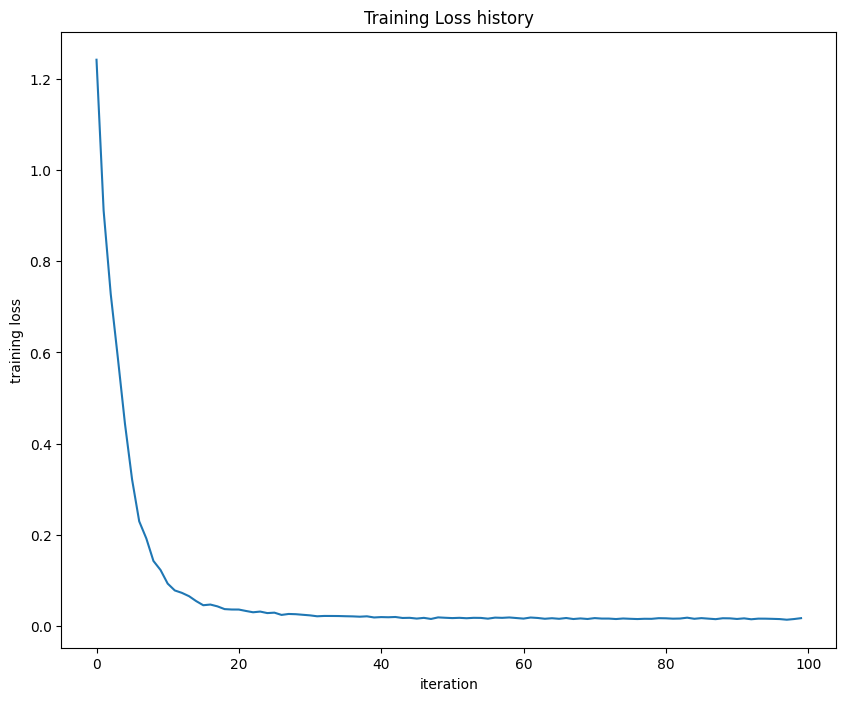

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту. 

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1. 

Обучите нейронную сеть на ваших данных. 

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

In [8]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [9]:
digits.images.shape, digits.data.shape

((1797, 8, 8), (1797, 64))

In [10]:
digits.keys()
mnist_images = digits.images
mnist_data_flat = digits.data
mnist_target = digits.target

In [11]:
try:
    del X_train_, y_train_
    del X_test_, y_test_
    print('Clear previously loaded data.')
except:
    pass

X_train_, X_test_, y_train_, y_test_ = train_test_split(mnist_data_flat, mnist_target, test_size=0.2, random_state=0)

# print('Training data shape: ', X_train.shape)
# print('Training labels shape: ', y_train.shape)
# print('Test data shape: ', X_test.shape)
# print('Test labels shape: ', y_test.shape)

In [12]:
X_train_.shape, X_test_.shape

((1437, 64), (360, 64))

In [13]:
num_train = 1300
num_val = 138
num_test = 300
num_dev = 59

X_train = X_train_[:num_train]
y_train = y_train_[:num_train]

X_val = X_train_[num_train: num_train + num_val]
y_val = y_train_[num_train: num_train + num_val]

X_test = X_test_[:num_test]
y_test = y_test_[:num_test]

X_dev = X_test_[num_test: num_test + num_dev]
y_dev = y_test_[num_test: num_test + num_dev]

In [14]:
print(f"Тренировочная выборка: X={X_train.shape}, y={y_train.shape}")
print(f"Валидационная выборка: X={X_val.shape}, y={y_val.shape}")
print(f"Тестовая выборка: X={X_test.shape}, y={y_test.shape}")

Тренировочная выборка: X=(1300, 64), y=(1300,)
Валидационная выборка: X=(137, 64), y=(137,)
Тестовая выборка: X=(300, 64), y=(300,)


[0.00000000e+00 3.20000000e-01 5.25538462e+00 1.17992308e+01
 1.18769231e+01 5.77230769e+00 1.33000000e+00 1.30769231e-01
 5.38461538e-03 2.02000000e+00]


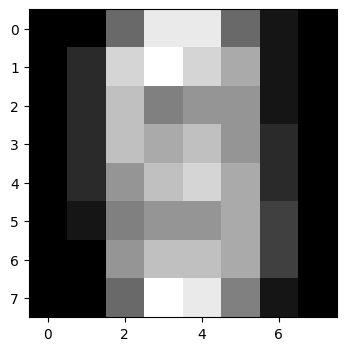

In [15]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10])
plt.figure(figsize=(4, 4))
plt.imshow(mean_image.reshape((8, 8)).astype('uint8'))
plt.show()

In [16]:
# X_train -= mean_image
# X_val -= mean_image
# X_test -= mean_image
# X_dev -= mean_image
#
# X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
# X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
# X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
# X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

X_train = np.concatenate((X_train, X_dev), axis=0)
y_train = np.concatenate((y_train, y_dev), axis=0)

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(1359, 64) (137, 64) (300, 64) (59, 64)


In [17]:
# input_size = 32 * 32 * 3
input_size = 8 * 8 * 1 #+ 1
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302595
iteration 100 / 1000: loss 2.302589
iteration 200 / 1000: loss 2.302588
iteration 300 / 1000: loss 2.302603
iteration 400 / 1000: loss 2.302591
iteration 500 / 1000: loss 2.302597
iteration 600 / 1000: loss 2.302599
iteration 700 / 1000: loss 2.302579
iteration 800 / 1000: loss 2.302557
iteration 900 / 1000: loss 2.302597
Validation accuracy:  0.06569343065693431


Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29. 

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др. 

Для лучшей модели вычислите acсuracy на тестовом наборе. 

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков.

In [18]:
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid

params = {
    'num_iters': [300, 500, 1000, 1500],
    'batch_size': [10, 30, 50, 75, 100, 150, 200],
    'learning_rate': [1e-1, 1e-2, 1e-3, 1e-4],
    'learning_rate_decay': [0.95],
    'reg': [0, 0.05, 0.10, 0.20, 0.25],
    'hidden_size': [5, 10, 20, 30, 40, 50]
}

df_params_sets = pd.DataFrame(columns=list(params.keys())+['valid_accuracy'])

stats_arr = []

models_arr = []

k = 0
for param_set in tqdm(ParameterGrid(params)):
    # print(f'Iteration {k}')

    input_size = 8 * 8 * 1 #+ 1
    hidden_size = param_set['hidden_size']
    num_classes = 10
    net = TwoLayerNet(input_size, hidden_size, num_classes)

    stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=param_set['num_iters'], batch_size=param_set['batch_size'],
                learning_rate=param_set['learning_rate'], learning_rate_decay=param_set['learning_rate_decay'],
                reg=param_set['reg'], verbose=False)

    stats_arr.append(stats)
    models_arr.append(net)

    val_acc = (net.predict(X_val) == y_val).mean()
    # print('Validation accuracy: ', val_acc)

    df_params_sets.loc[k] = [param_set['num_iters'], param_set['batch_size'], param_set['learning_rate'], param_set['learning_rate_decay'], param_set['reg'], param_set['hidden_size'], val_acc]

    k += 1

100%|██████████| 3360/3360 [09:09<00:00,  6.12it/s]


In [19]:
df_sorted = df_params_sets.sort_values(by=['valid_accuracy'], ascending=False)
df_sorted

,num_iters,batch_size,learning_rate,learning_rate_decay,reg,hidden_size,valid_accuracy
1770,1000.0,75.0,0.1000,0.95,0.00,40.0,1.000000
3285,500.0,200.0,0.1000,0.95,0.00,50.0,1.000000
2800,300.0,150.0,0.1000,0.95,0.00,50.0,1.000000
2095,1500.0,100.0,0.1000,0.95,0.00,20.0,1.000000
2730,1000.0,150.0,0.1000,0.95,0.00,40.0,1.000000
...,...,...,...,...,...,...,...
2012,1000.0,100.0,0.1000,0.95,0.10,10.0,0.065693
2011,1000.0,100.0,0.1000,0.95,0.05,10.0,0.065693
2010,1000.0,100.0,0.1000,0.95,0.00,10.0,0.065693
2008,500.0,100.0,0.1000,0.95,0.20,10.0,0.065693


In [20]:
best_id = df_sorted.index[0]

best_stats = stats_arr[best_id]
best_param_set = list(ParameterGrid(params))[best_id]
best_net = models_arr[best_id]

In [21]:
best_id

1770

Text(0, 0.5, 'Loss')

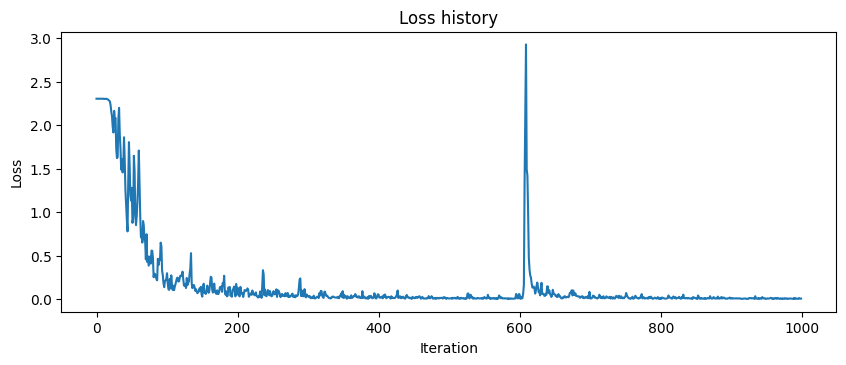

In [22]:
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

# plt.subplot(2, 1, 2)
# plt.plot(stats['train_acc_history'], label='train')
# plt.plot(stats['val_acc_history'], label='val')
# plt.title('Classification accuracy history')
# plt.xlabel('Epoch')
# plt.ylabel('Classification accuracy')
# plt.legend()
# plt.show()

In [23]:
print(f"Test accuracy: {(best_net.predict(X_test) == y_test).mean()}")

Test accuracy: 0.9766666666666667


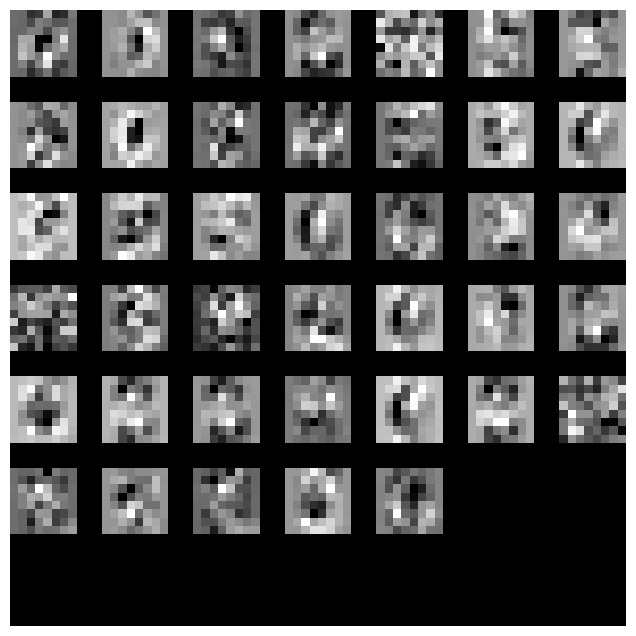

In [24]:
from scripts.vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    # print(W1.shape)
    W1 = W1.reshape(8, 8, 1, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(best_net)

Сделайте выводы по результатам работы.

Была реализована двуслойная полносвязная нейронная сеть и алгоритм ее обучения.

С увеличением количества эпох в обучении нейронной сети уменьшается ошибка на проверочных данных.

Для приведенного набора данных лучшими гиперпараметрами оказались:

In [25]:
best_param_set

{'batch_size': 75,
 'hidden_size': 40,
 'learning_rate': 0.1,
 'learning_rate_decay': 0.95,
 'num_iters': 1000,
 'reg': 0}

In [26]:
# Интересный факт (т.к. мало данных)
[stats for stats in stats_arr if len(stats['val_acc_history']) > 1]

[]